In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people

In [2]:
faces = fetch_lfw_people(min_faces_per_person=80)

In [3]:
faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

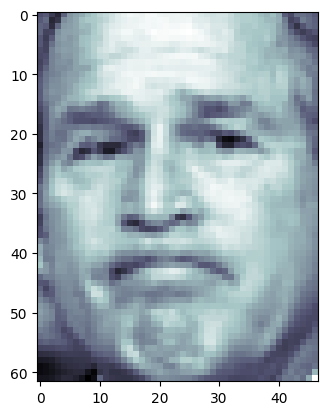

In [4]:
plt .imshow(faces.images[0], cmap = 'bone')

In [5]:
faces.images[0].shape

(62, 47)

In [6]:
62*47

2914

In [7]:
X = faces.data.T ## data is the flatten form of these images

In [8]:
X.shape # 1140 flattened face data available here

(2914, 1140)

In [9]:
m = X.mean(axis = 1)[:,np.newaxis]

In [10]:
m

array([[0.35198358],
       [0.36399513],
       [0.38627198],
       ...,
       [0.45471764],
       [0.42580688],
       [0.39794424]], dtype=float32)

In [11]:
m.shape

(2914, 1)

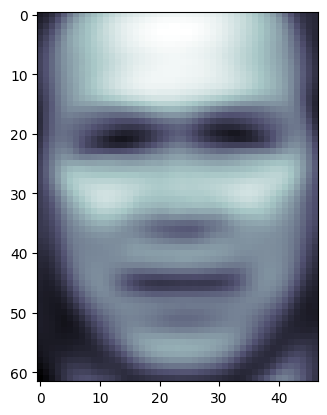

In [12]:
plt.imshow(m.reshape((62,47)), cmap = 'bone')

In [13]:
Xc = X - m
C = Xc.dot(Xc.T) # Covariance matrix

In [14]:
Xc.shape

(2914, 1140)

In [15]:
C.shape

(2914, 2914)

# Now calculate Eigen Values and Eigen Vectors of this Covariance Matrix(C)

In [16]:
e, W = LA.eig(C) # e = Eigen Values(Array), W = Eigen Vectors(Matrix)

In [17]:
# now sort in descending order

idx = np.argsort(e)[::-1]
e = e[idx]
W = W[:,idx]

In [18]:
len(e)

2914

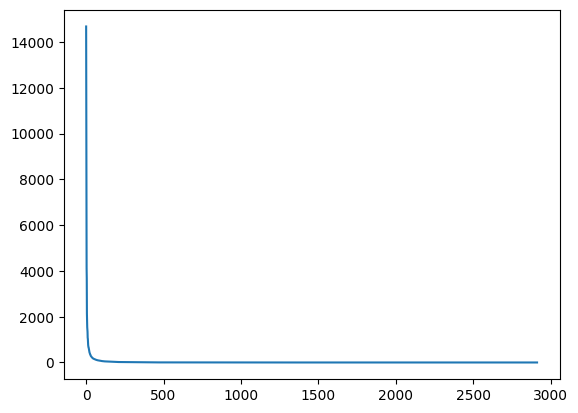

In [19]:
plt.plot(np.arange(len(e)),e)

## now reduce dimention from 2914 to 100

In [20]:
k = 300
W_k = W[:,0:k]

In [21]:
W_k.shape

(2914, 300)

In [22]:
Y = W_k.T.dot(Xc)

In [23]:
Y.shape

(300, 1140)

## now reconstruct dimention from 100 to 2914

In [24]:
Xc_r = W_k.dot(Y)

In [25]:
Xc_r.shape

(2914, 1140)

In [26]:
X_r = Xc_r + m

## now compare Original VS Reconstructed

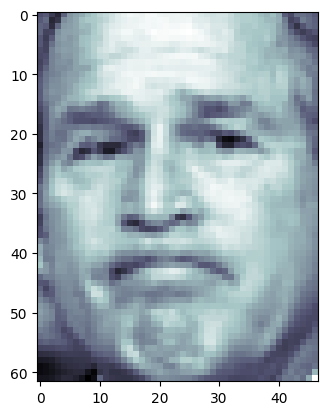

In [27]:
plt.imshow(X[:,0].reshape((62,47)), cmap = 'bone')

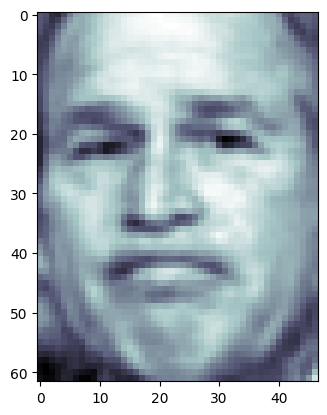

In [28]:
plt.imshow(X_r[:,0].reshape((62,47)), cmap = 'bone')

# Plot some Eigen Faces (using these k fases, all faces in this dataset can be constructed)

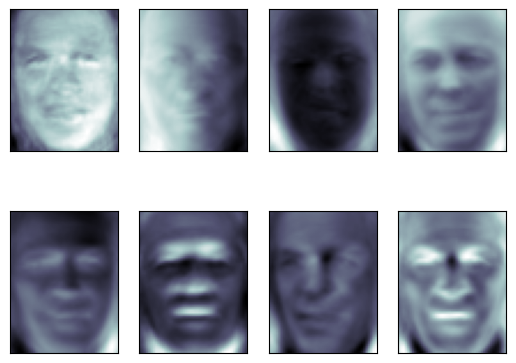

In [29]:
fig, ax = plt.subplots(2,4)
for idx, axidx in enumerate(ax.flat):
    axidx.imshow(W_k[:,idx].reshape((62,47)), cmap = 'bone')
    axidx.set(xticks = [], yticks = [])